## World Happiness Ranking


In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1 - Recolectar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/MachineLearningII'
ds = pd.read_csv(path+'/ds_final.csv')

## 2 - Explorar datos

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Happiness Score            782 non-null    float64
 3   GDP per Capita             782 non-null    float64
 4   Life Expectancy            782 non-null    float64
 5   Freedom                    782 non-null    float64
 6   Perceptions of corruption  782 non-null    float64
 7   Generosity                 782 non-null    float64
 8   Region                     782 non-null    object 
dtypes: float64(7), object(2)
memory usage: 55.1+ KB


In [ ]:
des = ds.describe()
des.loc['Nan'] = ds.isna().sum()
des.loc['%Nan'] = (ds.isna().mean())*100
des

,Year,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,2016.993606,5.379018,0.916047,0.612416,0.411091,0.125674,0.218576
std,1.417364,1.127456,0.407340,0.248309,0.152880,0.105959,0.122321
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.509750,0.606500,0.440183,0.309768,0.054250,0.130000
50%,2017.000000,5.322000,0.982205,0.647310,0.431000,0.091033,0.201982
75%,2018.000000,6.189500,1.236187,0.808000,0.531000,0.156243,0.278832
max,2019.000000,7.769000,2.096000,1.141000,0.724000,0.551910,0.838075
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Se puede ver que no hay elementos faltantes (NaN) como tampoco hay variables categóricas texto.

In [ ]:
# Cantidad de filas a analizar
print('Cantidad de filas del dataset:', ds.shape[0])

Cantidad de filas del dataset: 782


In [ ]:
ds.head()

,Year,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Region
0,2015.0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Western Europe
1,2015.0,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Western Europe
2,2015.0,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Western Europe
3,2015.0,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Western Europe
4,2015.0,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,North America


## 3 - Procesamiento de los datos
Hay datos que corresponden a multiclase, para mejorar su tratamiento por el modelo realizaremos OneHotEncoding para separar las clases en columnas. Clases para codificar:
- Region

La variable de salida se codificara en 1 si el puntaje de felicidad es mayor o igual a 5.5 y en 0 si es menor. No elegimos un valor mayor ya que de lo contrario se desbalancearia mucho el dataset

Otros tipos de datos entre las columnas:
- La feature Year se quitara.
- La feature Country se quitara.

### Variable de salida

In [ ]:
ds['Happiness Score'] = ds['Happiness Score'].apply(lambda label: 0 if label <= 5.5 else 1)
print(len(ds[ds['Happiness Score'] == 0]))
print(len(ds[ds['Happiness Score'] == 1]))

426
356


### OHE en Region

In [ ]:
reg = pd.get_dummies(ds.Region, prefix="Region")
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Region_Australia and New Zealand        782 non-null    uint8
 1   Region_Central and Eastern Europe       782 non-null    uint8
 2   Region_Eastern Asia                     782 non-null    uint8
 3   Region_Latin America and Caribbean      782 non-null    uint8
 4   Region_Middle East and Northern Africa  782 non-null    uint8
 5   Region_North America                    782 non-null    uint8
 6   Region_Southeastern Asia                782 non-null    uint8
 7   Region_Southern Asia                    782 non-null    uint8
 8   Region_Sub-Saharan Africa               782 non-null    uint8
 9   Region_Western Europe                   782 non-null    uint8
dtypes: uint8(10)
memory usage: 7.8 KB


In [ ]:
ds = pd.concat([ds, reg], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    782 non-null    float64
 1   Country                                 782 non-null    object 
 2   Happiness Score                         782 non-null    int64  
 3   GDP per Capita                          782 non-null    float64
 4   Life Expectancy                         782 non-null    float64
 5   Freedom                                 782 non-null    float64
 6   Perceptions of corruption               782 non-null    float64
 7   Generosity                              782 non-null    float64
 8   Region                                  782 non-null    object 
 9   Region_Australia and New Zealand        782 non-null    uint8  
 10  Region_Central and Eastern Europe       782 non-null    uint8 

In [ ]:
ds_final = ds.drop(['Year', 'Country', 'Region'], axis=1)

In [ ]:
# Separar los datos en entrada/feature (X) y salida/target (y)
y = ds_final['Happiness Score'].values
X_data = ds_final.drop(['Happiness Score'], axis=1)

In [ ]:
# Por último, normalizamos la data de entrada
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X_data)
print(X)

print(y[:10])

[[0.66627385 0.82509202 0.91929558 ... 0.         0.         1.        ]
 [0.62133588 0.8307099  0.86846685 ... 0.         0.         1.        ]
 [0.6323855  0.76655565 0.8969337  ... 0.         0.         1.        ]
 ...
 [0.16698473 0.31638913 0.         ... 1.         0.         0.        ]
 [0.01240458 0.09202454 0.31077348 ... 0.         1.         0.        ]
 [0.14599237 0.25854514 0.01381215 ... 0.         1.         0.        ]]
[1 1 1 1 1 1 1 1 1 1]


## 4 - Preparar los datos de entrenamiento
- Ahora que ya tenemos todos los datos, podemos compararlos en una matriz de correlación para ver el aporte de cada feature a la salida.


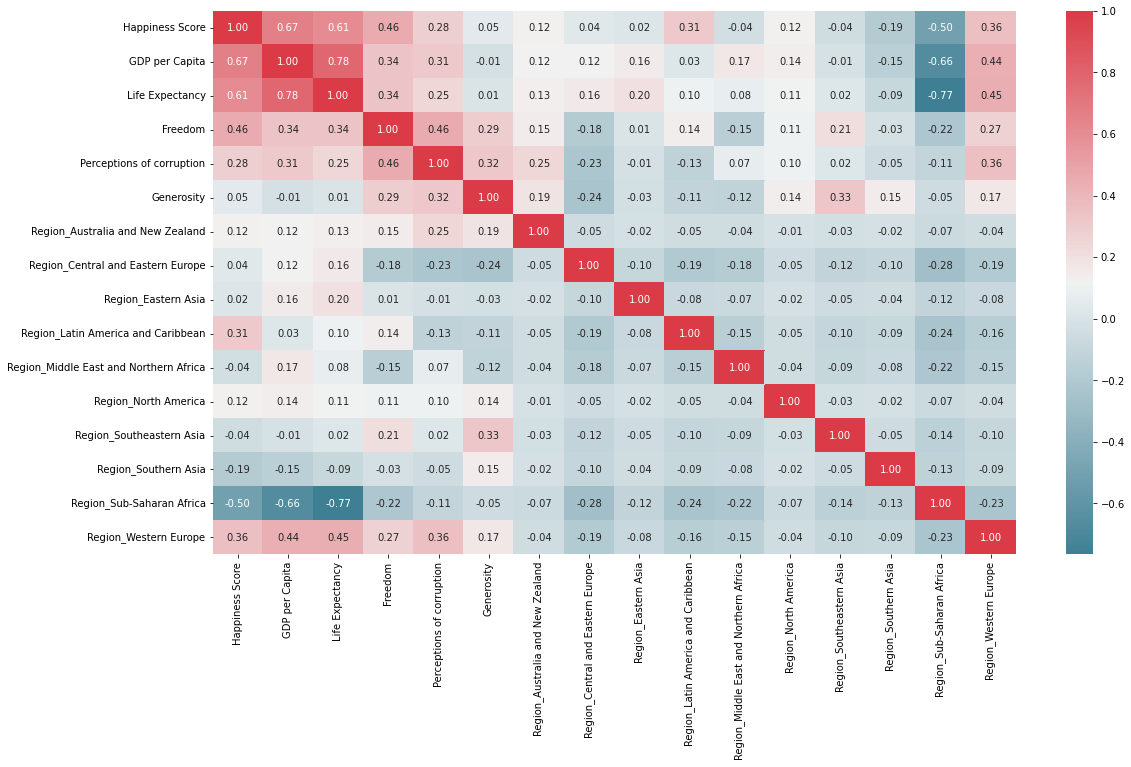

In [ ]:
corr = ds_final.corr()
fig, ax1 = plt.subplots(1, figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

## 5 - Entrenar los modelos
- Entrenar diferentes modelos y encontrar el mejor performante contra el dataset de test. Para eso se utilizarán los siguientes algoritmos de clasificación:
 - Decision Tree
 - Random Forest
 - Logistic Regresion
 - KNN
 - SVM Classifier
 - AdaBoost Classifier
 - XGBoost Classifier

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble  import AdaBoostClassifier
import xgboost as xgb

In [ ]:
# Separar los datos de entrenamiento (train) y de prueba (test) 20%
from sklearn.model_selection import train_test_split
indices = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, index_train, index_test = train_test_split(X, y, indices, test_size=0.20, random_state=42)

In [ ]:
df_train = ds_final.loc[index_train, :]
df_test =  ds_final.loc[index_test, :]

df_train.to_csv("df_train.csv", index = False)
df_test.to_csv("df_test.csv", index = False)

In [ ]:
# Separar los datos de entrenamiento y valid para hyperparameter tunning
X_train_tuning, X_valid_tuning, y_train_tuning, y_valid_tuning = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
classifier = []
accuracy = []

In [ ]:
class ModelCompare():
    def __init__(self):
        self.name = ""
        self.model = None
        self.accuracy = 0
        self.f1_score = 0

    def it2hp(self, it):
        # itearation_to_hyperparameter
        raise NotImplemented

    def fit(self, X_train, y_train, hp):
        raise NotImplemented
    
    def compare(self, X_train, y_train, X_test, y_test, iteration=100):
        models = []

        mean_acc = np.zeros((iteration))
        std_acc = np.zeros((iteration))
        f1_scores = np.zeros((iteration))

        for it in range(iteration):
            # Train de model
            model = self.fit(X_train, y_train, self.it2hp(it+1))

            # Predict
            y_hat = model.predict(X_test)   

            # Evaluar el modelo
            mean_acc[it] = metrics.accuracy_score(y_test, y_hat)    
            std_acc[it] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
            f1_scores[it] = metrics.f1_score(y_test, y_hat)
            models.append(model)

        plt.plot(range(1, iteration+1), mean_acc,'darkBlue')
        plt.fill_between(range(1, iteration+1), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
        plt.legend(('Accuracy ', '+/- std'))
        plt.ylabel('Accuracy ')
        plt.xlabel('hp')
        plt.tight_layout()
        plt.show()

        print(f"La mejor exactitud se obtuvo con {mean_acc.max():.2f} con hp={self.it2hp(mean_acc.argmax()+1)}")
        print(f"El mejor f1_score se obtuvo con {f1_scores.max():.2f} con hp={self.it2hp(mean_acc.argmax()+1)}")
        self.model = models[mean_acc.argmax()]
        self.accuracy = mean_acc.max()
        self.f1_score = f1_scores[mean_acc.argmax()]
      

class DecisionTreeCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "DecisionTreeClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = DecisionTreeClassifier(criterion="entropy", max_depth = hp)
        return self.model.fit(X_train,y_train)


class RandomForestCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "RandomForestClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = RandomForestClassifier(n_estimators=hp, random_state=1, class_weight = 'balanced')
        return self.model.fit(X_train,y_train)


class LogisticRegresionCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "LogisticRegression"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it / 100

    def fit(self, X_train, y_train, hp):
        self.model = LogisticRegression(C=hp, solver='sag')
        return self.model.fit(X_train,y_train)


class KNNCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "KNeighborsClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = KNeighborsClassifier(n_neighbors = hp)
        return self.model.fit(X_train,y_train)


class SVCCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "SupportVectorMachine"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = SVC()
        return self.model.fit(X_train,y_train)

class AdaBoostCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "AdaBoostClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = AdaBoostClassifier(n_estimators=hp)
        return self.model.fit(X_train,y_train)

class XGBoostCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "XGBClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=hp, random_state=42)
        return self.model.fit(X_train, y_train)

### Decision Tree

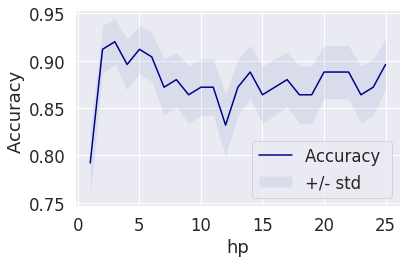

La mejor exactitud se obtuvo con 0.92 con hp=3
El mejor f1_score se obtuvo con 0.91 con hp=3


In [ ]:
model_compare_dt = DecisionTreeCompare()
model_compare_dt.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_dt.model

### Random Forest:

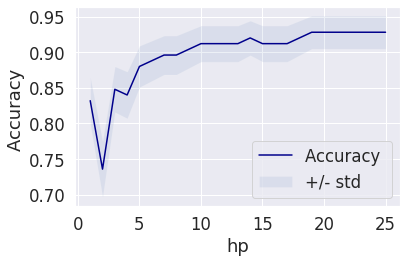

La mejor exactitud se obtuvo con 0.93 con hp=19
El mejor f1_score se obtuvo con 0.92 con hp=19


In [ ]:
model_compare_rf = RandomForestCompare()
model_compare_rf.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_rf.model

### Logistic Reresion

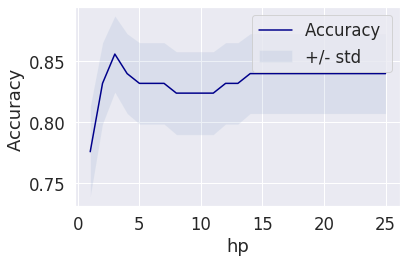

La mejor exactitud se obtuvo con 0.86 con hp=0.03
El mejor f1_score se obtuvo con 0.81 con hp=0.03


In [ ]:
model_compare_lr = LogisticRegresionCompare()
model_compare_lr.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_lr.model

### KNN

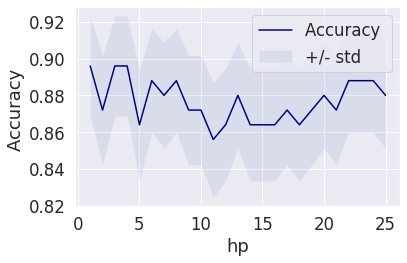

La mejor exactitud se obtuvo con 0.90 con hp=1
El mejor f1_score se obtuvo con 0.88 con hp=1


In [ ]:
model_compare_knn = KNNCompare()
model_compare_knn.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_knn.model

### SVM

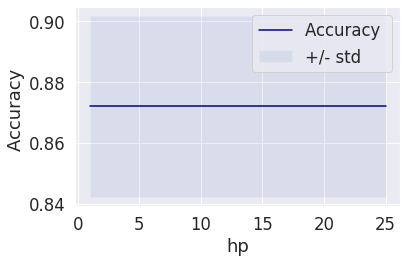

La mejor exactitud se obtuvo con 0.87 con hp=1
El mejor f1_score se obtuvo con 0.85 con hp=1


In [ ]:
model_compare_svc = SVCCompare()
model_compare_svc.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_svc.model

### Adaboost

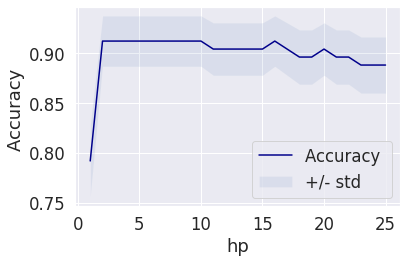

La mejor exactitud se obtuvo con 0.91 con hp=2
El mejor f1_score se obtuvo con 0.90 con hp=2


In [ ]:
model_compare_a = AdaBoostCompare()
model_compare_a.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_a.model

### XGBoost

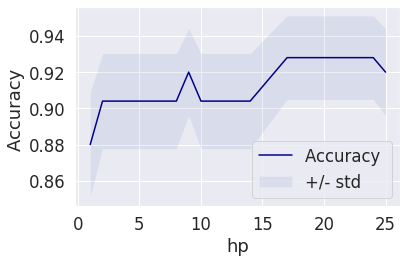

La mejor exactitud se obtuvo con 0.93 con hp=17
El mejor f1_score se obtuvo con 0.92 con hp=17


In [ ]:
model_compare_xgb = XGBoostCompare()
model_compare_xgb.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 25)
clf = model_compare_xgb.model

## 6 - Seleccionar de los hyperparámetros utilizando SearchCV

El objetivo es utiliza primero RandomizedSearchCV que lleva menos tiempo ejecutarlo. Con los parámetros obtenidos con RandomizedSearchCV se realizará una búsqueda más fina con GridSearchCV en torno a esos parámetros.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

### Decision Tree

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

parameters_dt = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(5, 21, 3)) + [None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': list(range(2, 11, 2)),
    'min_samples_split': list(range(2, 11, 2)),
}

In [ ]:
start_time = time.time()
clf_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=parameters_dt, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_dt.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_dt.best_estimator_

seconds:  2.037442684173584


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf_dt.best_score_

0.8832000000000001

#### Grid Search

In [ ]:
reduce_parameters_dt = {
    'criterion': ['entropy'],
    'max_depth': list(range(10, 18, 1)) + [None],
    'max_features': ['log2'],
    'min_samples_leaf': list(range(4, 8, 1)),
    'min_samples_split': list(range(2, 6, 1)),
}

In [ ]:
start_time = time.time()
clf_grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=reduce_parameters_dt, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_dt.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_dt.best_estimator_

seconds: 1.2996032238006592


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf_grid_dt.best_score_

0.8848

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_dt.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_dt.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_dt.predict(X_test))}")

Model Precision: 0.8428571428571429
Model Recall: 0.7763157894736842
Model F1-score: 0.8082191780821917


### Random Forest

#### Random Search

In [ ]:
parameters_rf = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(5, 21, 3)) + [None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': list(range(2, 11, 2)),
    'min_samples_split': list(range(2, 11, 2)),
    'n_estimators': list(range(10, 25))
}

In [ ]:
start_time = time.time()
clf_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters_rf, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_rf.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_rf.best_estimator_

seconds:  16.112813234329224


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_rf.best_score_

0.9136

#### Grid Search

In [ ]:
reduce_parameters_rf = {
    'criterion': ['entropy'],
    'max_depth': list(range(5, 11, 2)) + [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': list(range(7, 13)),
    'min_samples_split': list(range(6, 11)),
    'n_estimators': list(range(10, 20))
}

In [ ]:
start_time = time.time()
clf_grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=reduce_parameters_rf, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_rf.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_rf.best_estimator_

seconds: 154.24246454238892


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_grid_rf.best_score_

0.9104000000000001

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_rf.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_rf.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_rf.predict(X_test))}")

Model Precision: 0.8846153846153846
Model Recall: 0.9078947368421053
Model F1-score: 0.8961038961038961


### Logistic Regression

#### Random Search

In [ ]:
parameters_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'dual': [False, True],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': list(np.arange(0.00001, 0.001, 0.00001)),
    'C': list(np.arange(0.1, 2.0, 0.1))
}

In [ ]:
start_time = time.time()
clf_lr = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=parameters_lr, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_lr.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_lr.best_estimator_

seconds:  1.27315354347229


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear',
                   tol=0.0005200000000000001, verbose=0, warm_start=False)

In [ ]:
clf_lr.best_score_

0.8880000000000001

#### Grid Search

In [ ]:
reduce_parameters_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'dual': [False, True],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': list(np.arange(0.0001, 0.001, 0.0001)),
    'C': list(np.arange(0.15, 0.25, 0.01))
}

In [ ]:
start_time = time.time()
clf_grid_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=reduce_parameters_lr, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_lr.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_lr.best_estimator_

seconds: 20.561787605285645


LogisticRegression(C=0.17, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_grid_lr.best_score_

0.8992000000000001

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_lr.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_lr.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_lr.predict(X_test))}")

Model Precision: 0.9090909090909091
Model Recall: 0.9210526315789473
Model F1-score: 0.915032679738562


### KNN

#### Random Search

In [ ]:
parameters_knn = {
    'n_neighbors': list(np.arange(1, 20, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(np.arange(10, 50, 2)),
    'p': list(np.arange(1, 10, 2))
}

In [ ]:
start_time = time.time()
clf_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=parameters_knn, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_knn.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_knn.best_estimator_

seconds:  11.589252471923828


KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='distance')

In [ ]:
clf_lr.best_score_

0.8880000000000001

#### Grid Search

In [ ]:
reduce_parameters_knn = {
    'n_neighbors': list(np.arange(1, 5, 1)),
    'weights': ['distance'],
    'algorithm': ['ball_tree'],
    'leaf_size': list(np.arange(35, 45, 1)),
    'p': list(np.arange(1, 5, 1))
}

In [ ]:
start_time = time.time()
clf_grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=reduce_parameters_knn, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_knn.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_knn.best_estimator_

seconds: 14.760700702667236


KNeighborsClassifier(algorithm='ball_tree', leaf_size=35, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='distance')

In [ ]:
clf_grid_knn.best_score_

0.9248

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_knn.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_knn.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_knn.predict(X_test))}")

Model Precision: 0.925
Model Recall: 0.9736842105263158
Model F1-score: 0.9487179487179489


### SVM

#### Random Search

In [ ]:
parameters_svm = {
    'C': list(np.arange(0.1, 2, 0.1)),
    'kernel': ['rbf', 'sigmoid'],
    'degree': list(np.arange(1, 11, 2)),
    'gamma': ['scale', 'auto'],
    'tol': list(np.arange(0.00001, 0.001, 0.00001))
}

In [ ]:
start_time = time.time()
clf_svm = RandomizedSearchCV(estimator=SVC(), param_distributions=parameters_svm, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_svm.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_svm.best_estimator_

seconds:  4.14874005317688


SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0006200000000000001, verbose=False)

In [ ]:
clf_svm.best_score_

0.8800000000000001

#### Grid Search

In [ ]:
reduce_parameters_svm = {
    'C': list(np.arange(0.6, 1.4, 0.1)),
    'kernel': ['rbf'],
    'degree': list(np.arange(4, 9, 1)),
    'gamma': ['scale', 'auto'],
    'tol': list(np.arange(0.0003, 0.0009, 0.0001))
}

In [ ]:
start_time = time.time()
clf_grid_svm = GridSearchCV(estimator=SVC(), param_grid=reduce_parameters_svm, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_svm.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_svm.best_estimator_

seconds: 17.00518822669983


SVC(C=0.8999999999999999, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=4, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0003, verbose=False)

In [ ]:
clf_grid_svm.best_score_

0.8800000000000001

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_svm.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_svm.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_svm.predict(X_test))}")

Model Precision: 0.8805970149253731
Model Recall: 0.7763157894736842
Model F1-score: 0.8251748251748251


### Adaboost

#### Random Search

In [ ]:
parameters_a = {
    'n_estimators': list(np.arange(20, 80, 3)),
    'learning_rate': list(np.arange(0.1, 2, 0.2)),
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [ ]:
start_time = time.time()
clf_a = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=parameters_a, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_a.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_a.best_estimator_

seconds:  39.58023953437805


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.30000000000000004, n_estimators=59,
                   random_state=None)

In [ ]:
clf_a.best_score_

0.9024000000000001

#### Grid Search

In [ ]:
reduce_parameters_a = {
    'n_estimators': list(np.arange(50, 70, 1)),
    'learning_rate': list(np.arange(0.1, 1, 0.1)),
    'algorithm': ['SAMME.R']
}

In [ ]:
start_time = time.time()
clf_grid_a = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=reduce_parameters_a, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_a.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_a.best_estimator_

seconds: 94.24589776992798


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=61, random_state=None)

In [ ]:
clf_grid_a.best_score_

0.9072000000000001

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_a.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_a.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_a.predict(X_test))}")

Model Precision: 0.9
Model Recall: 0.9473684210526315
Model F1-score: 0.9230769230769231


### XGBoost

#### Random Search

In [ ]:
parameters_xgb = {
    'max_depth': list(np.arange(1, 11, 3)),
    'learning_rate': list(np.arange(0.1, 2, 0.2)),
    'n_estimators': list(np.arange(80, 120, 3)),
    'booster': ['gbtree', 'gblinear', 'dart']
}

In [ ]:
start_time = time.time()
clf_xgb = RandomizedSearchCV(estimator=xgb.XGBClassifier(), param_distributions=parameters_xgb, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_xgb.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_xgb.best_estimator_

seconds:  26.482709646224976


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.3000000000000003, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=104, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf_xgb.best_score_

0.9232000000000001

#### Grid Search

In [ ]:
reduce_parameters_xgb = {
    'max_depth': list(np.arange(5, 10, 1)),
    'learning_rate': list(np.arange(1, 2, 0.1)),
    'n_estimators': list(np.arange(100, 110, 1)),
    'booster': ['dart']
}

In [ ]:
start_time = time.time()
clf_grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=reduce_parameters_xgb, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid_xgb.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid_xgb.best_estimator_

seconds: 251.063729763031


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf_grid_xgb.best_score_

0.9232000000000001

#### Metrics

In [ ]:
print(f"Model Precision: {precision_score(y_test, clf_grid_xgb.predict(X_test))}")
print(f"Model Recall: {recall_score(y_test, clf_grid_xgb.predict(X_test))}")
print(f"Model F1-score: {f1_score(y_test, clf_grid_xgb.predict(X_test))}")

Model Precision: 0.8860759493670886
Model Recall: 0.9210526315789473
Model F1-score: 0.9032258064516129


## 7 - Conclusiones

In [ ]:
pd.DataFrame(data=[[clf_dt.best_score_,clf_rf.best_score_,clf_lr.best_score_,clf_knn.best_score_,clf_svm.best_score_,clf_a.best_score_,clf_xgb.best_score_],\
                           [clf_grid_dt.best_score_, clf_grid_rf.best_score_, clf_grid_lr.best_score_, clf_grid_knn.best_score_, clf_grid_svm.best_score_, clf_grid_a.best_score_, clf_grid_xgb.best_score_]],\
                      index=['Random Search', 'Grid Search'], columns=['Decision Tree', 'Random Forest', 'Regresion Logistica', 'KNN', 'SVM', 'Adaboost', 'XGBoost'])

,Decision Tree,Random Forest,Regresion Logistica,KNN,SVM,Adaboost,XGBoost
Random Search,0.8832,0.9136,0.8880,0.9216,0.88,0.9024,0.9232
Grid Search,0.8848,0.9104,0.8992,0.9248,0.88,0.9072,0.9232


In [ ]:
pd.DataFrame(data=[[precision_score(y_test, clf_grid_dt.predict(X_test)), precision_score(y_test, clf_grid_rf.predict(X_test)), precision_score(y_test, clf_grid_lr.predict(X_test)), precision_score(y_test, clf_grid_knn.predict(X_test)), precision_score(y_test, clf_grid_svm.predict(X_test)), precision_score(y_test, clf_grid_a.predict(X_test)), precision_score(y_test, clf_grid_xgb.predict(X_test))],\
                   [recall_score(y_test, clf_grid_dt.predict(X_test)), recall_score(y_test, clf_grid_rf.predict(X_test)), recall_score(y_test, clf_grid_lr.predict(X_test)), recall_score(y_test, clf_grid_knn.predict(X_test)), recall_score(y_test, clf_grid_svm.predict(X_test)), recall_score(y_test, clf_grid_a.predict(X_test)), recall_score(y_test, clf_grid_xgb.predict(X_test))],\
                   [f1_score(y_test, clf_grid_dt.predict(X_test)), f1_score(y_test, clf_grid_rf.predict(X_test)), f1_score(y_test, clf_grid_lr.predict(X_test)), f1_score(y_test, clf_grid_knn.predict(X_test)), f1_score(y_test, clf_grid_svm.predict(X_test)), f1_score(y_test, clf_grid_a.predict(X_test)), f1_score(y_test, clf_grid_xgb.predict(X_test))]],\
             index=['Precision', 'Recall', 'F1-Score'], columns=['Decision Tree', 'Random Forest', 'Regresion Logistica', 'KNN', 'SVM', 'Adaboost', 'XGBoost'])

,Decision Tree,Random Forest,Regresion Logistica,KNN,SVM,Adaboost,XGBoost
Precision,0.842857,0.884615,0.909091,0.925000,0.880597,0.900000,0.886076
Recall,0.776316,0.907895,0.921053,0.973684,0.776316,0.947368,0.921053
F1-Score,0.808219,0.896104,0.915033,0.948718,0.825175,0.923077,0.903226


En el presente trabajo me he familiarizado con las herramientas de optimizacion de hiperparametros de los distintos clasificadores vistos en clase. Se pueden observar los buenos resultados que se obtienen al implementar estas tecnicas  y su facil implentacion.